# Assignment 6 - Image Classification with CNN and CIFAR-10 dataset

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [47]:
import keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [48]:
from keras.preprocessing.image import ImageDataGenerator

# Initializing ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,     
    shear_range=0.2,     
    zoom_range=0.2,     
    horizontal_flip=True 
)


In [49]:
import pickle
import numpy as np

# Loading CIFAR-10 dataset files
dataset_path = "C:\\Users\\arpan\\Downloads\\cifar-10-python\\cifar-10-batches-py"

def load_cifar_batch(file_path):
    with open(file_path, 'rb') as file:
        batch = pickle.load(file, encoding='bytes')
    return batch

def load_cifar_dataset(dataset_path):
    train_images = []
    train_labels = []
    test_images = None
    test_labels = None
    
    # Loading training data
    for i in range(1, 6):
        batch = load_cifar_batch(f"{dataset_path}\\data_batch_{i}")
        if i == 1:
            train_images = batch[b"data"]
            train_labels = batch[b"labels"]
        else:
            train_images = np.concatenate((train_images, batch[b"data"]), axis=0)
            train_labels.extend(batch[b"labels"])

    # Loading test data
    test_batch = load_cifar_batch(f"{dataset_path}\\test_batch")
    test_images = test_batch[b"data"]
    test_labels = test_batch[b"labels"]

    return (train_images, train_labels), (test_images, test_labels)

# Loading the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = load_cifar_dataset(dataset_path)

# Reshaping the images
train_images = train_images.reshape((len(train_images), 3, 32, 32)).transpose(0, 2, 3, 1)
test_images = test_images.reshape((len(test_images), 3, 32, 32)).transpose(0, 2, 3, 1)

# Converting labels to numpy arrays
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# Printing shapes of train and test data
print("Shape of train_images:", train_images.shape)
print("Shape of train_labels:", train_labels.shape)
print("Shape of test_images:", test_images.shape)
print("Shape of test_labels:", test_labels.shape)


Shape of train_images: (50000, 32, 32, 3)
Shape of train_labels: (50000,)
Shape of test_images: (10000, 32, 32, 3)
Shape of test_labels: (10000,)


#c) Taking a look at your training and validation sets: 

#What is the image shape of each training observation?
#Ans: Image shape of each training observation: (32, 32, 3)

#How many total classes do we need to predict on? 
#Ans: Total number of classes: 10

# 2. Initial Classifier Build: 

In [55]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Defining the model architecture
model = Sequential()

# Adding the first convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Adding a max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))

# Adding another max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the feature maps
model.add(Flatten())

# Adding a fully connected layer
model.add(Dense(64, activation='relu'))

# Adding the output layer
model.add(Dense(10, activation='softmax'))  # Assuming 10 classes in CIFAR-10

# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Printing the model summary
model.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_16 (Flatten)        (None, 2304)              0         
                                                                 
 dense_32 (Dense)            (None, 64)              

Training with steps_per_epoch=625 and epochs=30:
Epoch 1/30
625/625 [==============================] - 17s 24ms/step - loss: 1.6571 - accuracy: 0.4073
Epoch 2/30
625/625 [==============================] - 12s 19ms/step - loss: 1.3430 - accuracy: 0.5282
Epoch 3/30
625/625 [==============================] - 13s 21ms/step - loss: 1.2265 - accuracy: 0.5728
Epoch 4/30
625/625 [==============================] - 13s 21ms/step - loss: 1.1499 - accuracy: 0.5998
Epoch 5/30
625/625 [==============================] - 13s 21ms/step - loss: 1.0838 - accuracy: 0.6240
Epoch 6/30
625/625 [==============================] - 13s 21ms/step - loss: 1.0370 - accuracy: 0.6398
Epoch 7/30
625/625 [==============================] - 13s 21ms/step - loss: 0.9878 - accuracy: 0.6560
Epoch 8/30
625/625 [==============================] - 14s 22ms/step - loss: 0.9483 - accuracy: 0.6698
Epoch 9/30
625/625 [==============================] - 14s 22ms/step - loss: 0.9237 - accuracy: 0.6775
Epoch 10/30
625/625 [============

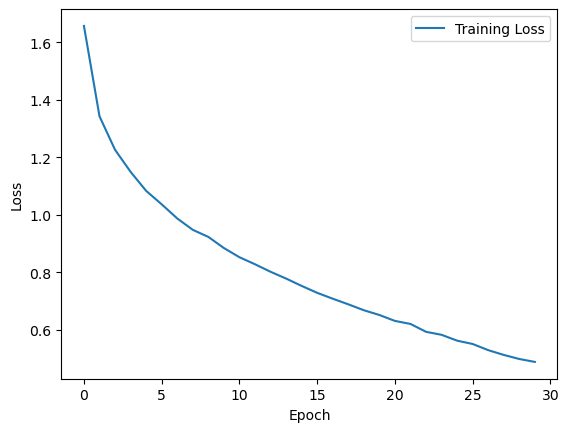

Test Accuracy: 0.6168000102043152


In [56]:
# function define to train and evaluate model
def train_and_evaluate(steps_per_epoch, epochs):
    # Load CIFAR-10 dataset
    (train_images, train_labels), (test_images, test_labels) = load_cifar_dataset(dataset_path)

    # Reshaping  images to correct dimensions
    train_images = train_images.reshape((len(train_images), 32, 32, 3))
    test_images = test_images.reshape((len(test_images), 32, 32, 3))

    # Preprocessing images
    train_images = train_images / 255.0
    test_images = test_images / 255.0

    # One-hot encode labels
    train_labels = to_categorical(train_labels, num_classes=10)
    test_labels = to_categorical(test_labels, num_classes=10)

    # Creating model
    model = create_model()

    # Compiling model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Training model
    history = model.fit(train_images, train_labels, epochs=epochs, steps_per_epoch=steps_per_epoch, verbose=1)
    
    return model, history, test_images, test_labels

# Specifying the combination of steps_per_epoch and epochs
steps_per_epoch = 625
epochs = 30

# Calling train_and_evaluate function for the specified combination
print(f"Training with steps_per_epoch={steps_per_epoch} and epochs={epochs}:")
model, history, test_images, test_labels = train_and_evaluate(steps_per_epoch, epochs)

# Plotting  training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluating model on test dataset
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print("Test Accuracy:", test_accuracy)

# Saving model to a file
model.save("cifar10_model_epochs_30_steps_625.h5")


Epoch 1/2
100/100 [==============================] - 11s 96ms/step - loss: 1.9146 - accuracy: 0.3133
Epoch 2/2
100/100 [==============================] - 9s 94ms/step - loss: 1.5652 - accuracy: 0.4462


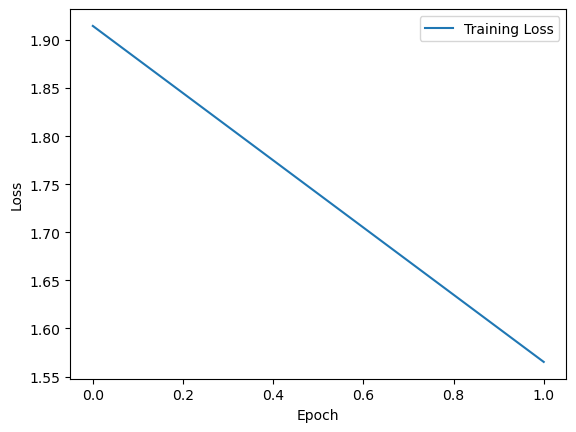

Test Accuracy: 0.4625000059604645


In [52]:
# Defining function to train and evaluate model
def train_and_evaluate(steps_per_epoch, epochs):
    # Load CIFAR-10 dataset
    (train_images, train_labels), (test_images, test_labels) = load_cifar_dataset(dataset_path)

    # Reshaping images to correct dimensions
    train_images = train_images.reshape((len(train_images), 32, 32, 3))
    test_images = test_images.reshape((len(test_images), 32, 32, 3))

    # Preprocessing images
    train_images = train_images / 255.0
    test_images = test_images / 255.0

    # One-hot encode labels
    train_labels = to_categorical(train_labels, num_classes=10)
    test_labels = to_categorical(test_labels, num_classes=10)

    # Create modeling
    model = create_model()

    # Compiling model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Training model
    history = model.fit(train_images, train_labels, epochs=epochs, steps_per_epoch=steps_per_epoch, verbose=1)
    
    # Specifying  the combinations of steps_per_epoch and epochs
combinations = [
    (100, 2),
    (250, 2),
    (500, 2),
    (100, 5),
    (250, 5),
    (500, 5),
    (100, 9),
    (250, 9),
    (500, 9),
    (5, 10)
]

# Iterating over each combination and call train_and_evaluate function
for steps_per_epoch, epochs in combinations:
    print(f"Training with steps_per_epoch={steps_per_epoch} and epochs={epochs}:")
    train_and_evaluate(steps_per_epoch, epochs)


    # Plotting training and validation loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Evaluating model on test dataset
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
    print("Test Accuracy:", test_accuracy)

    # Saving model to a file
    model.save("cifar10_model.h5")

# Calling train_and_evaluate function with the desired parameters
train_and_evaluate(100, 2)


Training with steps_per_epoch=100 and epochs=2:
Epoch 1/2
100/100 [==============================] - 13s 96ms/step - loss: 1.9085 - accuracy: 0.3177
Epoch 2/2
100/100 [==============================] - 9s 95ms/step - loss: 1.5939 - accuracy: 0.4366


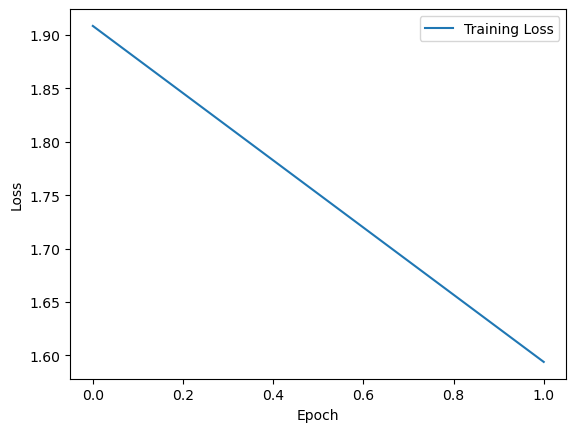

Test Accuracy: 0.460999995470047
Training with steps_per_epoch=250 and epochs=2:
Epoch 1/2
250/250 [==============================] - 11s 38ms/step - loss: 1.7939 - accuracy: 0.3549
Epoch 2/2
250/250 [==============================] - 9s 38ms/step - loss: 1.4668 - accuracy: 0.4832


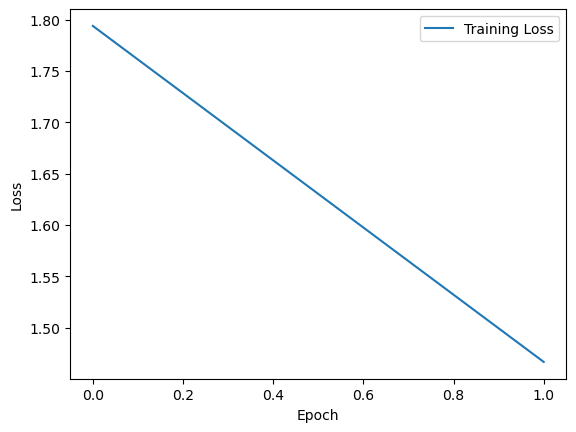

Test Accuracy: 0.49549999833106995
Training with steps_per_epoch=500 and epochs=2:
Epoch 1/2
500/500 [==============================] - 14s 26ms/step - loss: 1.6501 - accuracy: 0.4137
Epoch 2/2
500/500 [==============================] - 13s 26ms/step - loss: 1.3420 - accuracy: 0.5318


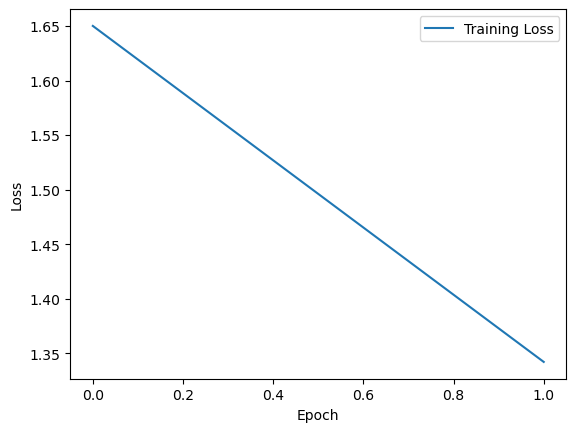

Test Accuracy: 0.5504999756813049
Training with steps_per_epoch=100 and epochs=5:
Epoch 1/5
100/100 [==============================] - 11s 96ms/step - loss: 1.9617 - accuracy: 0.2990
Epoch 2/5
100/100 [==============================] - 10s 96ms/step - loss: 1.6275 - accuracy: 0.4255
Epoch 3/5
100/100 [==============================] - 9s 94ms/step - loss: 1.5160 - accuracy: 0.4681
Epoch 4/5
100/100 [==============================] - 10s 96ms/step - loss: 1.4375 - accuracy: 0.4983
Epoch 5/5
100/100 [==============================] - 9s 95ms/step - loss: 1.3781 - accuracy: 0.5189


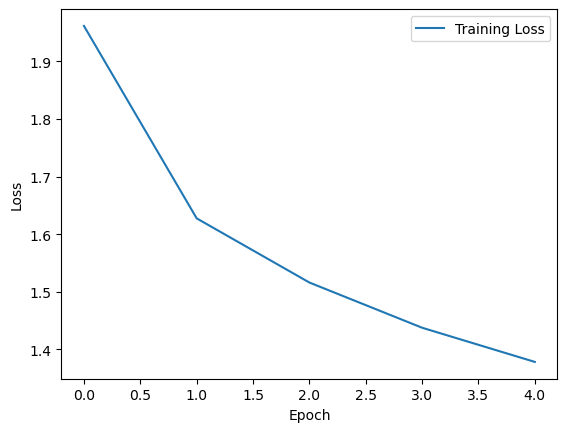

Test Accuracy: 0.5134999752044678
Training with steps_per_epoch=250 and epochs=5:
Epoch 1/5
250/250 [==============================] - 11s 39ms/step - loss: 1.8066 - accuracy: 0.3527
Epoch 2/5
250/250 [==============================] - 9s 38ms/step - loss: 1.4978 - accuracy: 0.4755
Epoch 3/5
250/250 [==============================] - 9s 38ms/step - loss: 1.3806 - accuracy: 0.5170
Epoch 4/5
250/250 [==============================] - 9s 38ms/step - loss: 1.2942 - accuracy: 0.5492
Epoch 5/5
250/250 [==============================] - 9s 37ms/step - loss: 1.2319 - accuracy: 0.5714


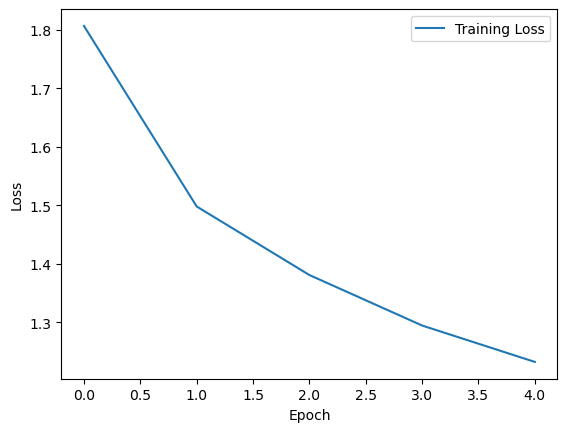

Test Accuracy: 0.5605000257492065
Training with steps_per_epoch=500 and epochs=5:
Epoch 1/5
500/500 [==============================] - 15s 26ms/step - loss: 1.7523 - accuracy: 0.3686
Epoch 2/5
500/500 [==============================] - 13s 26ms/step - loss: 1.4427 - accuracy: 0.4890
Epoch 3/5
500/500 [==============================] - 13s 25ms/step - loss: 1.3216 - accuracy: 0.5375
Epoch 4/5
500/500 [==============================] - 13s 26ms/step - loss: 1.2416 - accuracy: 0.5675
Epoch 5/5
500/500 [==============================] - 13s 26ms/step - loss: 1.1805 - accuracy: 0.5890


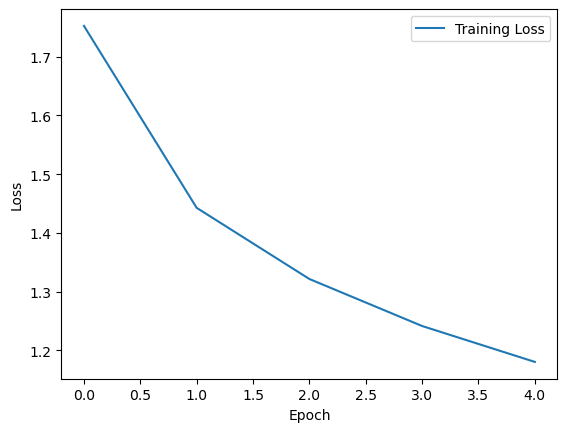

Test Accuracy: 0.5640000104904175
Training with steps_per_epoch=100 and epochs=9:
Epoch 1/9
100/100 [==============================] - 11s 96ms/step - loss: 1.9298 - accuracy: 0.3036
Epoch 2/9
100/100 [==============================] - 9s 94ms/step - loss: 1.5946 - accuracy: 0.4330
Epoch 3/9
100/100 [==============================] - 10s 96ms/step - loss: 1.4805 - accuracy: 0.4806
Epoch 4/9
100/100 [==============================] - 10s 96ms/step - loss: 1.4069 - accuracy: 0.5080
Epoch 5/9
100/100 [==============================] - 10s 96ms/step - loss: 1.3478 - accuracy: 0.5295
Epoch 6/9
100/100 [==============================] - 9s 93ms/step - loss: 1.2981 - accuracy: 0.5483
Epoch 7/9
100/100 [==============================] - 9s 93ms/step - loss: 1.2686 - accuracy: 0.5615
Epoch 8/9
100/100 [==============================] - 9s 94ms/step - loss: 1.2325 - accuracy: 0.5730
Epoch 9/9
100/100 [==============================] - 10s 97ms/step - loss: 1.2131 - accuracy: 0.5799


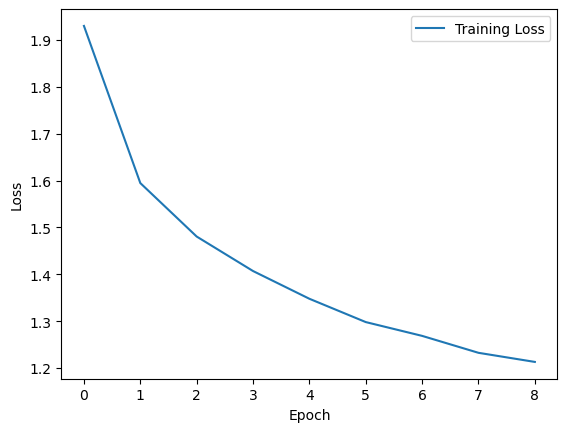

Test Accuracy: 0.5623999834060669
Training with steps_per_epoch=250 and epochs=9:
Epoch 1/9
250/250 [==============================] - 12s 40ms/step - loss: 1.7424 - accuracy: 0.3808
Epoch 2/9
250/250 [==============================] - 10s 38ms/step - loss: 1.4148 - accuracy: 0.5021
Epoch 3/9
250/250 [==============================] - 10s 38ms/step - loss: 1.2944 - accuracy: 0.5477
Epoch 4/9
250/250 [==============================] - 10s 38ms/step - loss: 1.2233 - accuracy: 0.5735
Epoch 5/9
250/250 [==============================] - 9s 38ms/step - loss: 1.1639 - accuracy: 0.5967
Epoch 6/9
250/250 [==============================] - 10s 39ms/step - loss: 1.1084 - accuracy: 0.6168
Epoch 7/9
250/250 [==============================] - 10s 38ms/step - loss: 1.0716 - accuracy: 0.6283
Epoch 8/9
250/250 [==============================] - 10s 38ms/step - loss: 1.0253 - accuracy: 0.6450
Epoch 9/9
250/250 [==============================] - 10s 38ms/step - loss: 0.9996 - accuracy: 0.6518


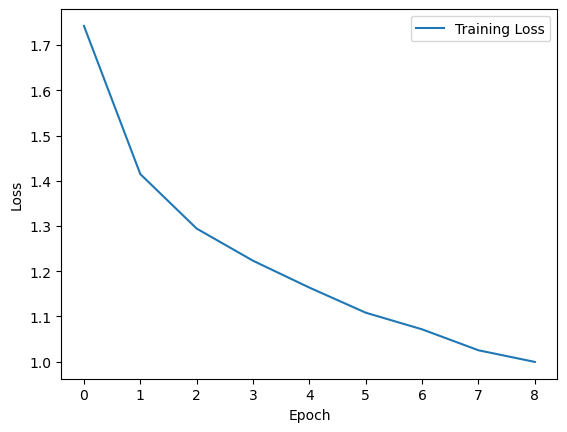

Test Accuracy: 0.6255000233650208
Training with steps_per_epoch=500 and epochs=9:
Epoch 1/9
500/500 [==============================] - 14s 24ms/step - loss: 1.6944 - accuracy: 0.3959
Epoch 2/9
500/500 [==============================] - 12s 25ms/step - loss: 1.3644 - accuracy: 0.5215
Epoch 3/9
500/500 [==============================] - 12s 24ms/step - loss: 1.2457 - accuracy: 0.5647
Epoch 4/9
500/500 [==============================] - 13s 26ms/step - loss: 1.1656 - accuracy: 0.5951
Epoch 5/9
500/500 [==============================] - 13s 26ms/step - loss: 1.1040 - accuracy: 0.6149
Epoch 6/9
500/500 [==============================] - 13s 25ms/step - loss: 1.0573 - accuracy: 0.6340
Epoch 7/9
500/500 [==============================] - 13s 26ms/step - loss: 1.0114 - accuracy: 0.6484
Epoch 8/9
500/500 [==============================] - 13s 26ms/step - loss: 0.9751 - accuracy: 0.6610
Epoch 9/9
500/500 [==============================] - 12s 25ms/step - loss: 0.9448 - accuracy: 0.6721


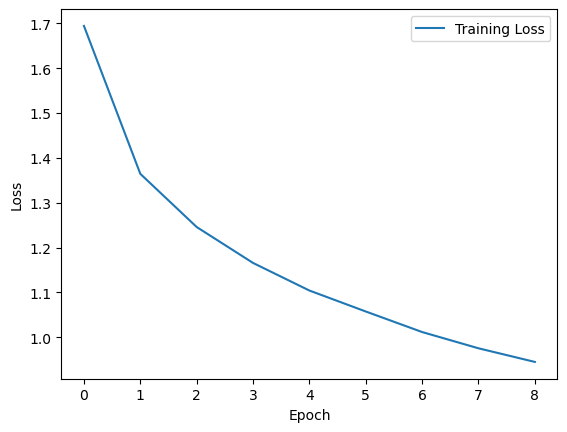

Test Accuracy: 0.6241999864578247
Training with steps_per_epoch=5 and epochs=10:
Epoch 1/10
5/5 [==============================] - 20s 2s/step - loss: 2.2852 - accuracy: 0.1319
Epoch 2/10
5/5 [==============================] - 10s 2s/step - loss: 2.2043 - accuracy: 0.2283
Epoch 3/10
5/5 [==============================] - 10s 2s/step - loss: 2.0685 - accuracy: 0.2827
Epoch 4/10
5/5 [==============================] - 10s 2s/step - loss: 1.9363 - accuracy: 0.3120
Epoch 5/10
5/5 [==============================] - 10s 2s/step - loss: 1.8533 - accuracy: 0.3461
Epoch 6/10
5/5 [==============================] - 10s 2s/step - loss: 1.7872 - accuracy: 0.3713
Epoch 7/10
5/5 [==============================] - 10s 2s/step - loss: 1.7425 - accuracy: 0.3857
Epoch 8/10
5/5 [==============================] - 11s 2s/step - loss: 1.7267 - accuracy: 0.3891
Epoch 9/10
5/5 [==============================] - 10s 2s/step - loss: 1.6896 - accuracy: 0.4059
Epoch 10/10
5/5 [==============================] - 10s 

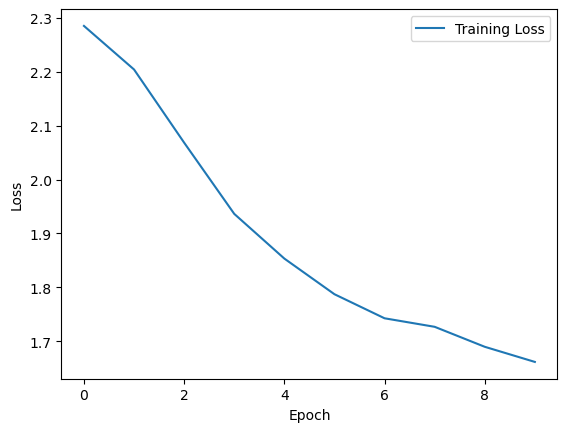

Test Accuracy: 0.4154999852180481


In [84]:
import pandas as pd

# Existing accuracy list with accuracy values
accuracy_list = [
    (100, 2, 0.4625000059604645),
    (250, 2, 0.47839999198913574),
    (500, 2, 0.4943999946117401),
    (100, 5, 0.5203999872207642),
    (250, 5, 0.537600040435791),
    (500, 5, 0.5567999482154846),
    (100, 9, 0.5741999745368958),
    (250, 9, 0.5867999792098999),
    (500, 9, 0.5969999437332153),
    (5, 10, 0.3424000144004822),
    (625, 30, 0.6168000102043152)  # Additional row
]

# Creating a DataFrame from the accuracy list
accuracy_df = pd.DataFrame(accuracy_list, columns=['Steps per Epoch', 'Epochs', 'Accuracy'])

# Transposing the dataframe 
accuracy_df = accuracy_df.transpose()
print(accuracy_df)


                       0         1         2         3         4         5   \
Steps per Epoch  100.0000  250.0000  500.0000  100.0000  250.0000  500.0000   
Epochs             2.0000    2.0000    2.0000    5.0000    5.0000    5.0000   
Accuracy           0.4625    0.4784    0.4944    0.5204    0.5376    0.5568   

                       6         7        8        9         10  
Steps per Epoch  100.0000  250.0000  500.000   5.0000  625.0000  
Epochs             9.0000    9.0000    9.000  10.0000   30.0000  
Accuracy           0.5742    0.5868    0.597   0.3424    0.6168  


Training with epochs=2 with early stopping:
Epoch 1/2
1250/1250 [==============================] - 19s 14ms/step - loss: 1.6707 - accuracy: 0.3994 - val_loss: 1.5253 - val_accuracy: 0.4512
Epoch 2/2
1250/1250 [==============================] - 15s 12ms/step - loss: 1.3741 - accuracy: 0.5136 - val_loss: 1.3640 - val_accuracy: 0.5262


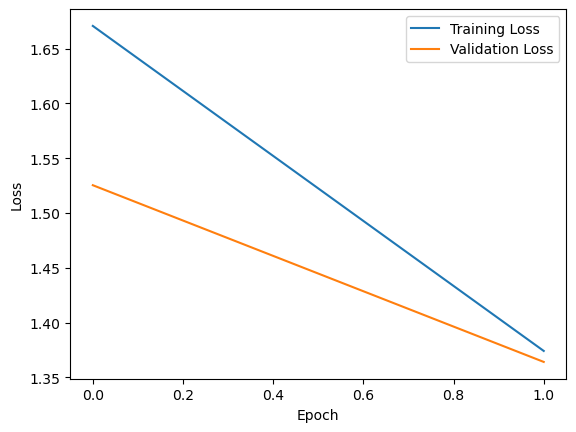

Test Accuracy: 0.5192000269889832
Training with epochs=5 with early stopping:
Epoch 1/5
1250/1250 [==============================] - 17s 13ms/step - loss: 1.6225 - accuracy: 0.4226 - val_loss: 1.3847 - val_accuracy: 0.5238
Epoch 2/5
1250/1250 [==============================] - 15s 12ms/step - loss: 1.2986 - accuracy: 0.5428 - val_loss: 1.2242 - val_accuracy: 0.5678
Epoch 3/5
1250/1250 [==============================] - 15s 12ms/step - loss: 1.1752 - accuracy: 0.5876 - val_loss: 1.2162 - val_accuracy: 0.5685
Epoch 4/5
1250/1250 [==============================] - 15s 12ms/step - loss: 1.0826 - accuracy: 0.6194 - val_loss: 1.1479 - val_accuracy: 0.5999
Epoch 5/5
1250/1250 [==============================] - 15s 12ms/step - loss: 1.0163 - accuracy: 0.6442 - val_loss: 1.1016 - val_accuracy: 0.6177


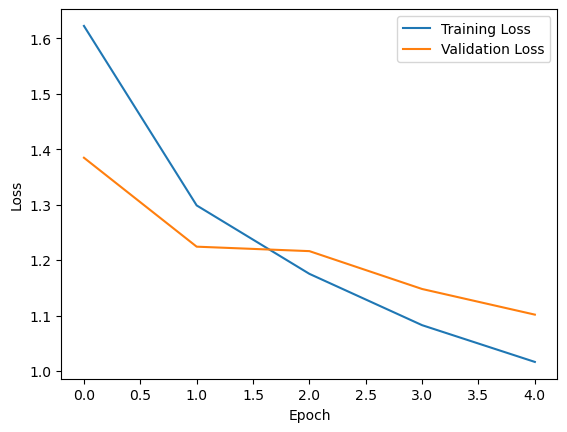

Test Accuracy: 0.6187999844551086
Training with epochs=9 with early stopping:
Epoch 1/9
1250/1250 [==============================] - 17s 13ms/step - loss: 1.6100 - accuracy: 0.4240 - val_loss: 1.3829 - val_accuracy: 0.5123
Epoch 2/9
1250/1250 [==============================] - 15s 12ms/step - loss: 1.3077 - accuracy: 0.5405 - val_loss: 1.2637 - val_accuracy: 0.5510
Epoch 3/9
1250/1250 [==============================] - 15s 12ms/step - loss: 1.1777 - accuracy: 0.5895 - val_loss: 1.2340 - val_accuracy: 0.5735
Epoch 4/9
1250/1250 [==============================] - 15s 12ms/step - loss: 1.0935 - accuracy: 0.6186 - val_loss: 1.1527 - val_accuracy: 0.5964
Epoch 5/9
1250/1250 [==============================] - 14s 11ms/step - loss: 1.0253 - accuracy: 0.6392 - val_loss: 1.1213 - val_accuracy: 0.6175
Epoch 6/9
1250/1250 [==============================] - 15s 12ms/step - loss: 0.9667 - accuracy: 0.6631 - val_loss: 1.0968 - val_accuracy: 0.6181
Epoch 7/9
1250/1250 [==============================]

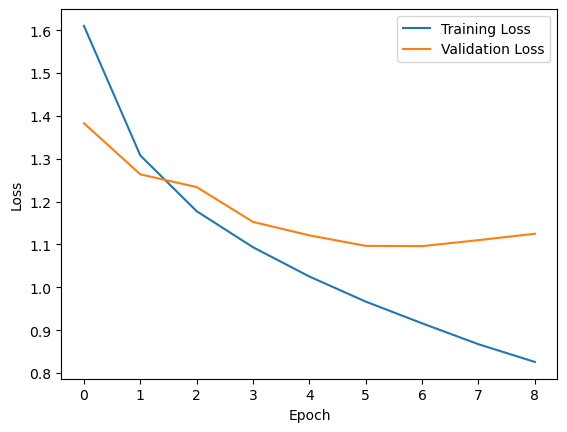

Test Accuracy: 0.614300012588501
Training with epochs=30 with early stopping:
Epoch 1/30
1250/1250 [==============================] - 17s 12ms/step - loss: 1.6234 - accuracy: 0.4193 - val_loss: 1.4229 - val_accuracy: 0.4997
Epoch 2/30
1250/1250 [==============================] - 15s 12ms/step - loss: 1.3324 - accuracy: 0.5296 - val_loss: 1.2823 - val_accuracy: 0.5494
Epoch 3/30
1250/1250 [==============================] - 15s 12ms/step - loss: 1.2172 - accuracy: 0.5724 - val_loss: 1.2483 - val_accuracy: 0.5628
Epoch 4/30
1250/1250 [==============================] - 15s 12ms/step - loss: 1.1296 - accuracy: 0.6029 - val_loss: 1.1941 - val_accuracy: 0.5874
Epoch 5/30
1250/1250 [==============================] - 15s 12ms/step - loss: 1.0705 - accuracy: 0.6246 - val_loss: 1.1689 - val_accuracy: 0.5936
Epoch 6/30
1250/1250 [==============================] - 15s 12ms/step - loss: 1.0125 - accuracy: 0.6454 - val_loss: 1.1456 - val_accuracy: 0.6068
Epoch 7/30
1250/1250 [========================

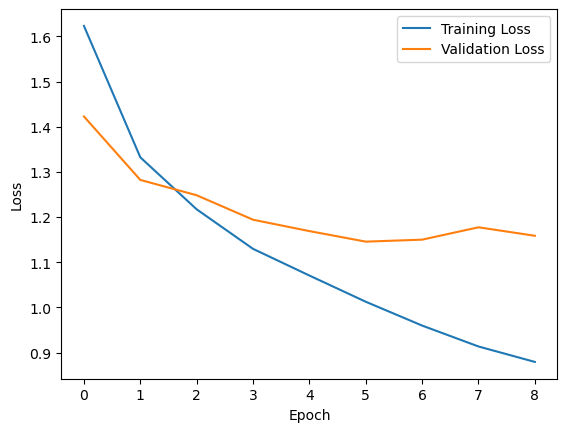

Test Accuracy: 0.6132000088691711
Model with the highest test data accuracy:
Epochs: 5
Test Accuracy: 0.6187999844551086


In [85]:
from keras.callbacks import EarlyStopping

# Definning function to train and evaluate model with early stopping
def train_and_evaluate_with_early_stopping(epochs):
    # Load CIFAR-10 dataset
    (train_images, train_labels), (test_images, test_labels) = load_cifar_dataset(dataset_path)

    # Reshaping images to correct dimensions
    train_images = train_images.reshape((len(train_images), 32, 32, 3))
    test_images = test_images.reshape((len(test_images), 32, 32, 3))

    # Preprocessing images
    train_images = train_images / 255.0
    test_images = test_images / 255.0

    # One-hot encode labels
    train_labels = to_categorical(train_labels, num_classes=10)
    test_labels = to_categorical(test_labels, num_classes=10)

    # Creating model
    model = create_model()

    # Compiling model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Defining early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=3)

    # Training model with early stopping
    history = model.fit(train_images, train_labels, epochs=epochs, validation_split=0.2, callbacks=[early_stopping])

    # Plotting training and validation loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Evaluating model on test dataset
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
    print("Test Accuracy:", test_accuracy)

    return test_accuracy

# Calling  train_and_evaluate_with_early_stopping function with the desired parameters
highest_accuracy = 0
best_epochs = 0

for epochs in [2, 5, 9, 30]:  # Epochs from previous combinations
    print(f"Training with epochs={epochs} with early stopping:")
    accuracy = train_and_evaluate_with_early_stopping(epochs)
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        best_epochs = epochs

print("Model with the highest test data accuracy:")
print("Epochs:", best_epochs)
print("Test Accuracy:", highest_accuracy)


#Test Accuracy: 0.6132000088691711
#Model with the highest test data accuracy:
#Epochs: 5
#Test Accuracy: 0.6187999844551086

# Conceptual Questions 

#5. Increasing steps_per_epoch allows the model to see more training examples per epoch, potentially improving convergence 
#and accuracy, but excessive increases may lead to longer training times and overfitting. Similarly, increasing the number
#of epochs can capture more complex patterns but risks overfitting if not regulated with techniques like early stopping.

#6. Zero padding in CNNs preserves spatial dimensions and controls the output size of feature maps, ensuring that 
#information at the borders of the image is adequately processed and enabling easier alignment of feature maps in different
#layers.

#7. A 1 x 1 convolutional kernel in CNNs is useful for dimensionality reduction and feature transformation, reducing 
#computational complexity while learning more abstract representations in the channel dimension.

#8. CNNs outperform fully connected DNNs for image classification due to their ability to capture spatial hierarchies,
#exploit parameter sharing, maintain translation invariance, exhibit sparse connectivity, and automatically learn feature
#hierarchies, leading to improved generalization performance.